In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def read_img(img_path):
    img = cv2.imread(img_path)
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dftshift = np.fft.fftshift(dft)
    amplitude = 20 * np.log(cv2.magnitude(dftshift[:, :, 0], dftshift[:, :, 1]))

    normalization = amplitude / (np.max(amplitude) - np.min(amplitude))
    return normalization

In [2]:
work_path = os.getcwd()
data_path = os.path.join(work_path, './airplane/1_fake')
img_path = os.path.join(data_path, '00091.png')
fake_path = os.walk(r".\images\1_fake")
real_path = os.walk(r".\images\0_real")
f_array = []
r_array = []
for path, dir_list, file_list in fake_path:
    for file_name in file_list:
        file_path = os.path.join(path, file_name)
        print(file_path)
        f_array.append(read_img(file_path))
for path, dir_list, file_list in real_path:
    for file_name in file_list:
        file_path = os.path.join(path, file_name)
        print(file_path)
        r_array.append(read_img(file_path))
f_ave = np.mean(np.array(f_array), axis=0)
r_ave = np.mean(np.array(r_array), axis=0)
im_color_f = cv2.applyColorMap(f_ave, cv2.COLORMAP_JET)
im_color_r = cv2.applyColorMap(r_ave, cv2.COLORMAP_JET)
plt.subplot(121), plt.imshow(im_color_f)
plt.title('fake'), plt.axis('off')
plt.subplot(122), plt.imshow(im_color_r)
plt.title('real'), plt.axis('off')
plt.show()

.\images\1_fake\n02381460_1000_fake.png


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\core\src\dxt.cpp:3335: error: (-215:Assertion failed) type == CV_32FC1 || type == CV_32FC2 || type == CV_64FC1 || type == CV_64FC2 in function 'cv::dft'


In [3]:
img = cv2.imread(r".\test\airplane\1_fake\00091.png")

In [7]:
# (3,256,256,2)
dft = np.array([cv2.dft(np.float32(img[:,:,i]), flags=cv2.DFT_COMPLEX_OUTPUT) for i in range(3)])

In [10]:
dftshift = np.empty(shape=dft.shape)
for i in range(3):
    dftshift[i] = np.fft.fftshift(dft[i])

In [11]:
amplitude = np.array([20 * np.log(cv2.magnitude(dftshift[i, :, :, 0], dftshift[i, :, :, 1])) for i in range(3)])

In [13]:
normalization = np.empty(shape=amplitude.shape)
for i in range(3):
    normalization[i] = amplitude[i] / np.max(amplitude[i]) - np.min(amplitude[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.41970393 0.33506823 0.32812092 ... 0.44787493 0.32812092 0.33506823]
 [0.40603197 0.41892126 0.38552397 ... 0.36926907 0.41044441 0.41441151]
 [0.35945418 0.37781775 0.37925985 ... 0.41582835 0.39754128 0.42020112]
 ...
 [0.41982198 0.37340084 0.42336893 ... 0.42677602 0.34681454 0.44951543]
 [0.35945415 0.42020112 0.39754128 ... 0.37659806 0.37925985 0.37781775]
 [0.40603197 0.41441151 0.41044441 ... 0.39832136 0.38552397 0.41892126]]
[[0.45005703 0.37690017 0.33087051 ... 0.47056243 0.33087051 0.37690017]
 [0.4386214  0.43241501 0.44266284 ... 0.41714749 0.43234155 0.44191685]
 [0.35120016 0.39576954 0.36743015 ... 0.42007554 0.41724661 0.43379444]
 ...
 [0.4545868  0.39267957 0.4478012  ... 0.44297493 0.38129306 0.46100906]
 [0.35120016 0.43379444 0.41724661 ... 0.41843814 0.36743015 0.39576954]
 [0.4386214  0.44191685 0.43234155 ... 0.41595355 0.44266284 0.43241501]]
[[0.41660187 0.32958868 0.3173191  ... 0.43340725 0.3173191  0.32958868]
 [0.38615754 0.40026829 0.40409836 ... 

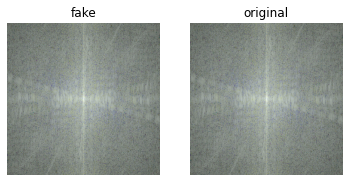

In [13]:
img = cv2.imread(r".\test\airplane\0_real\00226.png")
normalization = np.empty(shape=(256,256,3))
for i in range(3):
    dft = cv2.dft(np.float32(img[:,:,i]), flags=cv2.DFT_COMPLEX_OUTPUT)
    dftshift = np.fft.fftshift(dft)
    amplitude = 20 * np.log(cv2.magnitude(dftshift[:, :, 0], dftshift[:, :, 1]))
    normalization[:,:,i] = amplitude / (np.max(amplitude) - np.min(amplitude))
    print(normalization[:,:,i])

plt.subplot(121), plt.imshow(normalization)
plt.title('fake'), plt.axis('off')
plt.subplot(122), plt.imshow(normalization)
plt.title('original'), plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.41525188 0.32167184 0.39577612 ... 0.39529043 0.39577612 0.32167184]
 [0.40160298 0.24383147 0.39398086 ... 0.39625061 0.36951444 0.33859381]
 [0.4028036  0.28248295 0.38547525 ... 0.39042288 0.38213745 0.3529231 ]
 ...
 [0.38497382 0.33818153 0.312078   ... 0.41977966 0.39076141 0.36258081]
 [0.4028036  0.3529231  0.38213745 ... 0.38648519 0.38547525 0.28248295]
 [0.40160298 0.33859381 0.36951444 ... 0.40070218 0.39398086 0.24383147]]
[[0.44484115 0.31268081 0.40958822 ... 0.43481562 0.40958822 0.31268081]
 [0.4097712  0.29814908 0.40632078 ... 0.41402441 0.39938608 0.3590512 ]
 [0.43285555 0.33605772 0.41887712 ... 0.40472573 0.40442064 0.38550535]
 ...
 [0.40425554 0.35754433 0.31602851 ... 0.44163635 0.41895458 0.39061281]
 [0.43285555 0.38550535 0.40442064 ... 0.42463464 0.41887712 0.33605772]
 [0.4097712  0.3590512  0.39938608 ... 0.41041803 0.40632078 0.29814908]]
[[0.40805313 0.36901486 0.39994404 ... 0.41367617 0.39994404 0.36901486]
 [0.39892855 0.32917815 0.37081078 ... 

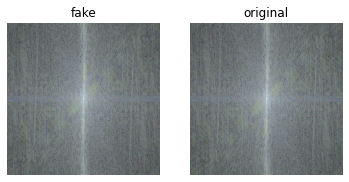

In [12]:
img = cv2.imread(r".\test\airplane\1_fake\00226.png")
normalization = np.empty(shape=(256,256,3))
for i in range(3):
    dft = cv2.dft(np.float32(img[:,:,i]), flags=cv2.DFT_COMPLEX_OUTPUT)
    dftshift = np.fft.fftshift(dft)
    amplitude = 20 * np.log(cv2.magnitude(dftshift[:, :, 0], dftshift[:, :, 1]))
    normalization[:,:,i] = amplitude / (np.max(amplitude) - np.min(amplitude))
    print(normalization[:,:,i])

plt.subplot(121), plt.imshow(normalization)
plt.title('fake'), plt.axis('off')
plt.subplot(122), plt.imshow(normalization)
plt.title('original'), plt.axis('off')
plt.show()